# Fraud detection

In [1]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
#misc libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('creditcard.csv')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.drop(['Time'], axis=1, inplace=True)

In [6]:
df.shape

(284807, 30)

In [7]:
selected_vars =['V4','V14','V10','V16','V9','V12','V11','V17','V7','V21','V18','V8','V1','V3','V6','V2','V27','V5','V26']

In [8]:
df1=df[selected_vars]
Target=df['Class']
df.drop('Class',axis=1, inplace=True)

In [9]:
df1.head()

,V4,V14,V10,V16,V9,V12,V11,V17,V7,V21,V18,V8,V1,V3,V6,V2,V27,V5,V26
0,1.378155,-0.311169,0.090794,-0.470401,0.363787,-0.617801,-0.551600,0.207971,0.239599,-0.018307,0.025791,0.098698,-1.359807,2.536347,0.462388,-0.072781,0.133558,-0.338321,-0.189115
1,0.448154,-0.143772,-0.166974,0.463917,-0.255425,1.065235,1.612727,-0.114805,-0.078803,-0.225775,-0.183361,0.085102,1.191857,0.166480,-0.082361,0.266151,-0.008983,0.060018,0.125895
2,0.379780,-0.165946,0.207643,-2.890083,-1.514654,0.066084,0.624501,1.109969,0.791461,0.247998,-0.121359,0.247676,-1.358354,1.773209,1.800499,-1.340163,-0.055353,-0.503198,-0.139097
3,-0.863291,-0.287924,-0.054952,-1.059647,-1.387024,0.178228,-0.226487,-0.684093,0.237609,-0.108300,1.965775,0.377436,-0.966272,1.792993,1.247203,-0.185226,0.062723,-0.010309,-0.221929
4,0.403034,-1.119670,0.753074,-0.451449,0.817739,0.538196,-0.822843,-0.237033,0.592941,-0.009431,-0.038195,-0.270533,-1.158233,1.548718,0.095921,0.877737,0.219422,-0.407193,0.502292


Final Dataframe

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V4      284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V10     284807 non-null  float64
 3   V16     284807 non-null  float64
 4   V9      284807 non-null  float64
 5   V12     284807 non-null  float64
 6   V11     284807 non-null  float64
 7   V17     284807 non-null  float64
 8   V7      284807 non-null  float64
 9   V21     284807 non-null  float64
 10  V18     284807 non-null  float64
 11  V8      284807 non-null  float64
 12  V1      284807 non-null  float64
 13  V3      284807 non-null  float64
 14  V6      284807 non-null  float64
 15  V2      284807 non-null  float64
 16  V27     284807 non-null  float64
 17  V5      284807 non-null  float64
 18  V26     284807 non-null  float64
dtypes: float64(19)
memory usage: 41.3 MB


In [11]:
sampling_res=pd.DataFrame(columns=['name','Train shape','normal percent','fraud percent','accuracy','precision','recall','f1-score','tn', 'fp', 'fn', 'tp'])
sampling_c=0

In [12]:
#original dataset
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df, Target, test_size = 0.3,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [13]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
preds = RF.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [14]:
classes=Target.value_counts()
normal_share=round(classes[0]/Target.count()*100,2)
fraud_share=round(classes[1]/Target.count()*100, 2)
R=classification_report(y_test, preds,output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sampling_res.loc[sampling_c]=['original',df.shape,normal_share,fraud_share,R['accuracy'],precision_score(y_test, preds),recall_score(y_test, preds),f1_score(y_test, preds),tn, fp, fn, tp]
sampling_c+=1

In [15]:
X_train = X_train[selected_vars] #select the variables from variable selection proces
X_test = X_test[selected_vars]

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 19) (199364,)
(85443, 19) (85443,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
preds = RF.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
classes=Target.value_counts()
normal_share=round(classes[0]/Target.count()*100,2)
fraud_share=round(classes[1]/Target.count()*100, 2)
R=classification_report(y_test, preds,output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sampling_res.loc[sampling_c]=['feature selected',df1.shape,normal_share,fraud_share,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
sampling_c+=1

# outlier

## LocalOutlierFactor

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [20]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((492, 19), (284315, 19))

In [21]:
clf = LocalOutlierFactor()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [22]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [23]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [24]:
lof_res=result[result['Class']!=-1]
lof_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(48, 20)

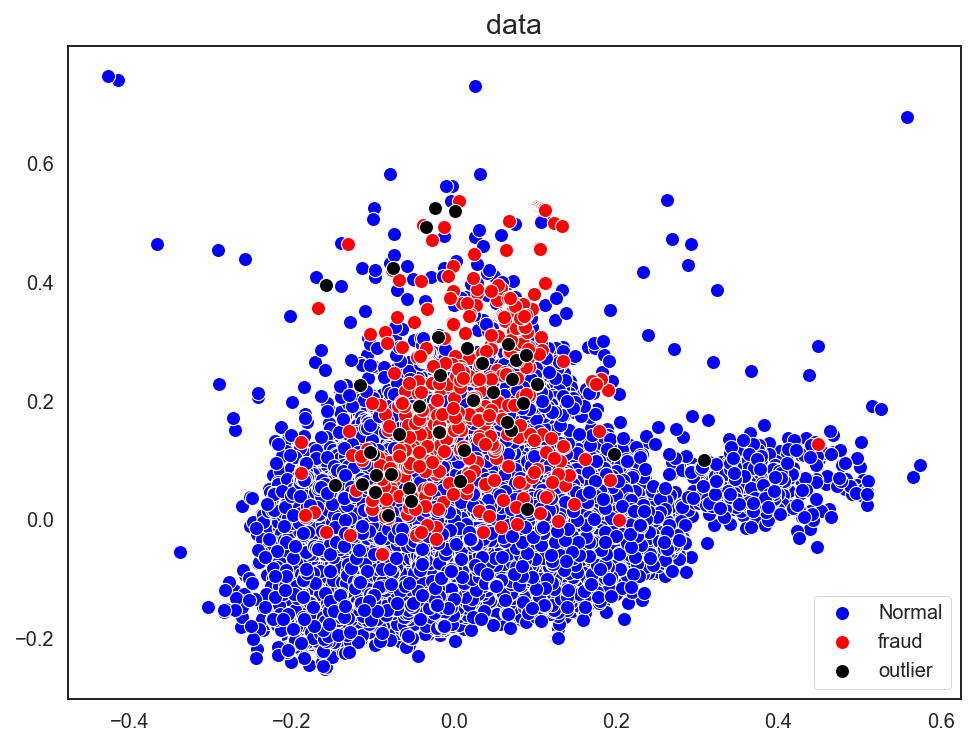

In [25]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

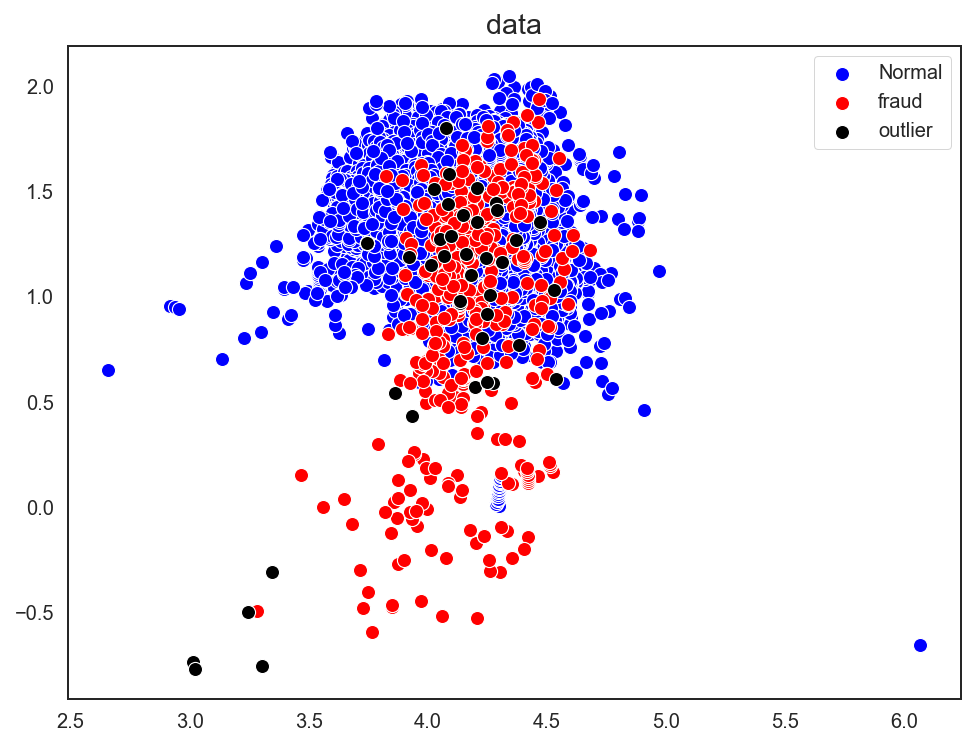

In [26]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## IsolationForest

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((492, 19), (284315, 19))

In [29]:
clf = IsolationForest(random_state=0)
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [30]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [31]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [32]:
isf_res=result[result['Class']!=-1]
isf_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(58, 20)

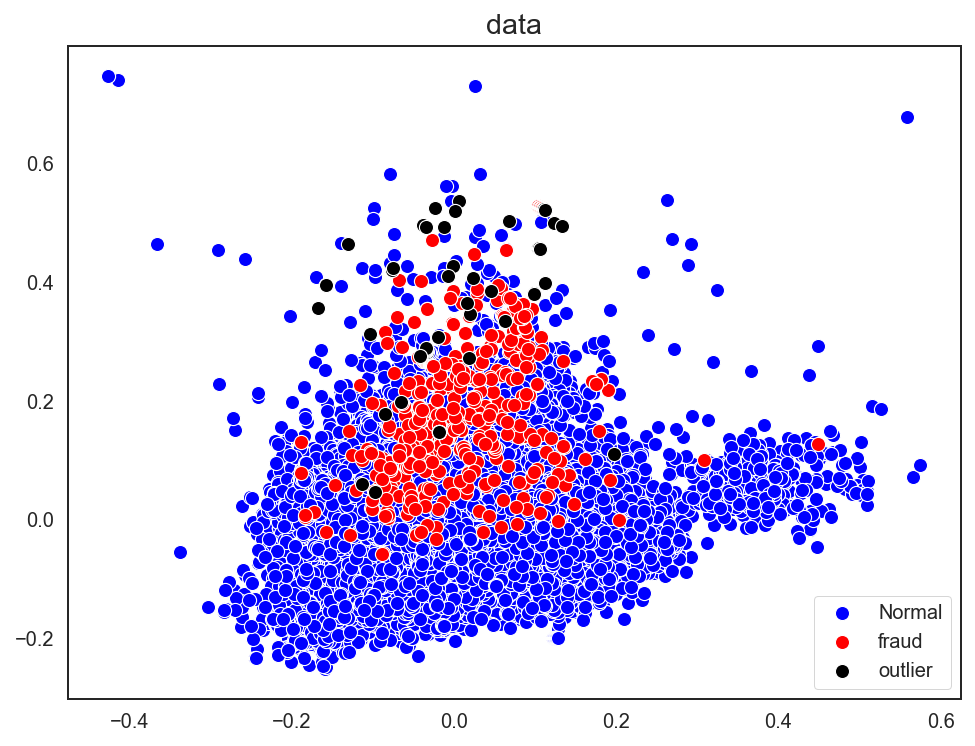

In [33]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

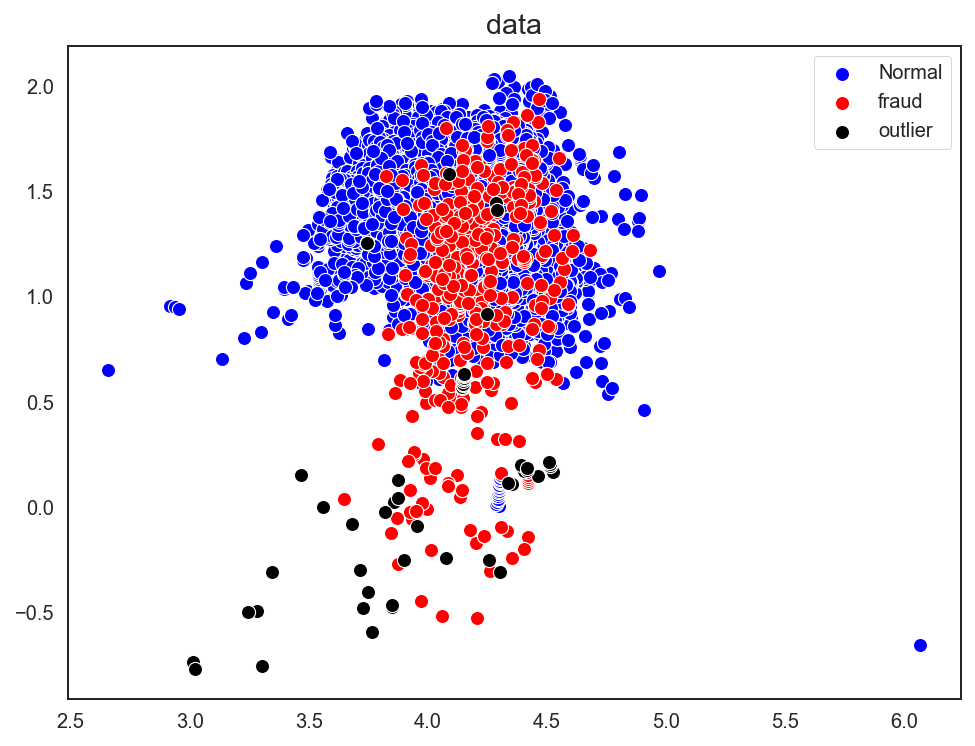

In [34]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## EllipticEnvelope

In [35]:
from sklearn.covariance import EllipticEnvelope

In [36]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((492, 19), (284315, 19))

In [37]:
clf = EllipticEnvelope(random_state=0)
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [38]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [39]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [40]:
ee_res=result[result['Class']!=-1]
ee_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(50, 20)

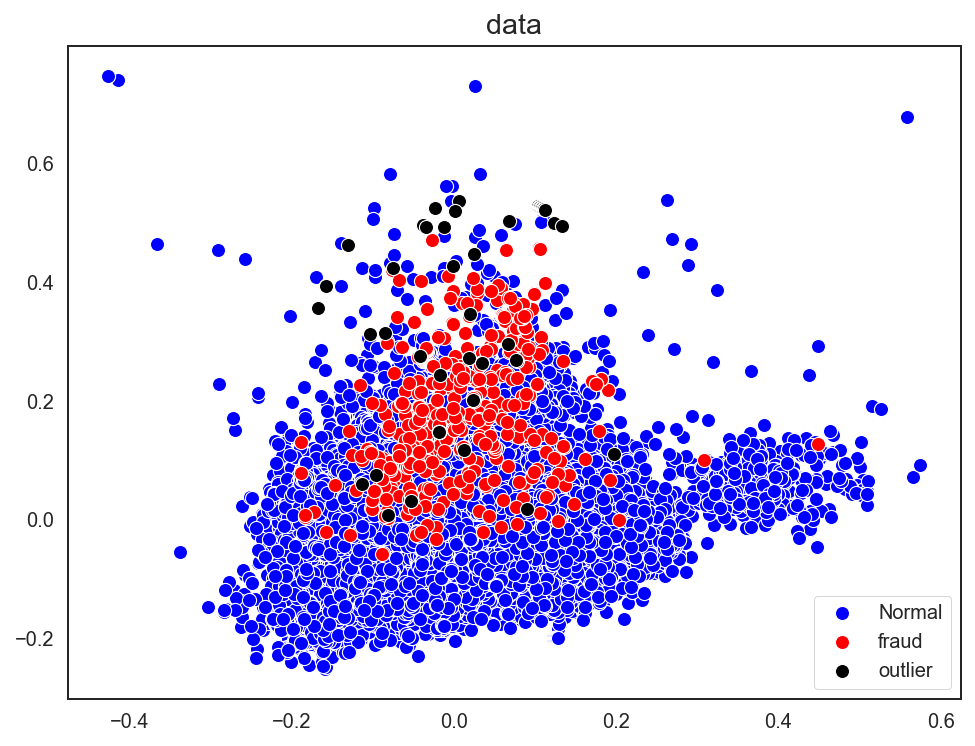

In [41]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

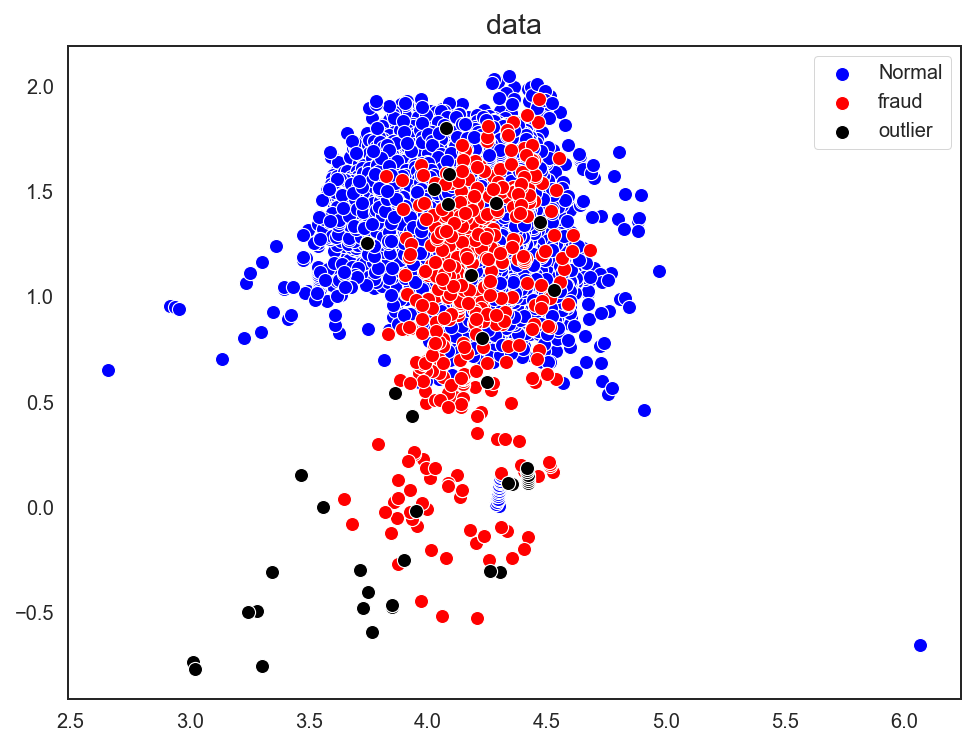

In [42]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## OneClassSVM

In [43]:
from sklearn.svm import OneClassSVM

In [44]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((492, 19), (284315, 19))

In [45]:
clf = OneClassSVM()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1], dtype=int64)

In [46]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [47]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [48]:
osvm_res=result[result['Class']!=-1]
osvm_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(247, 20)

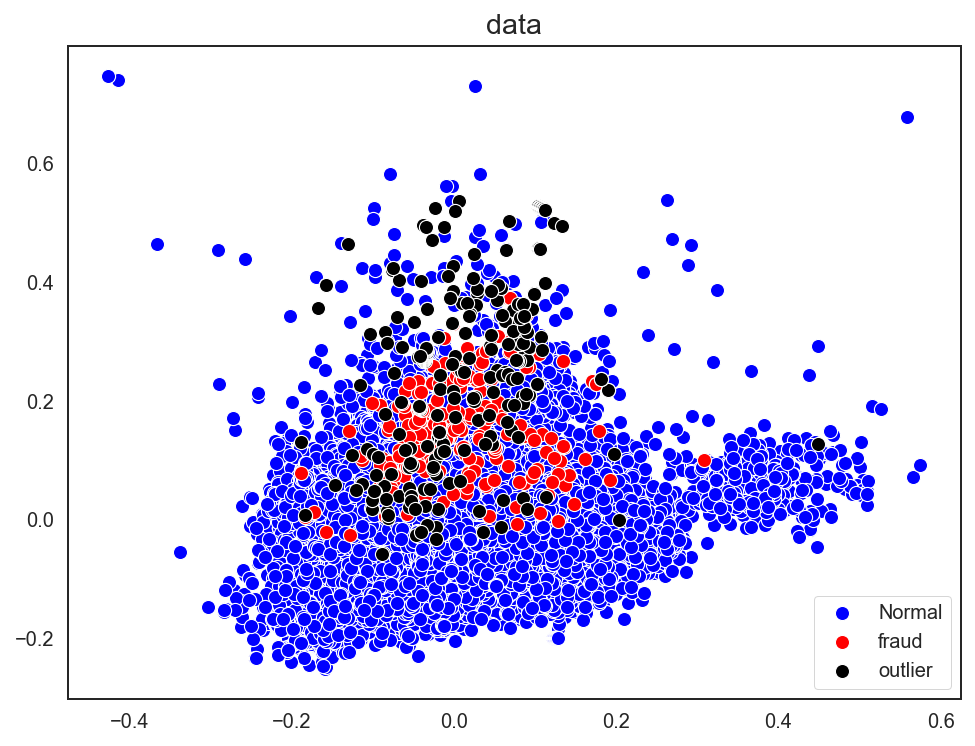

In [49]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

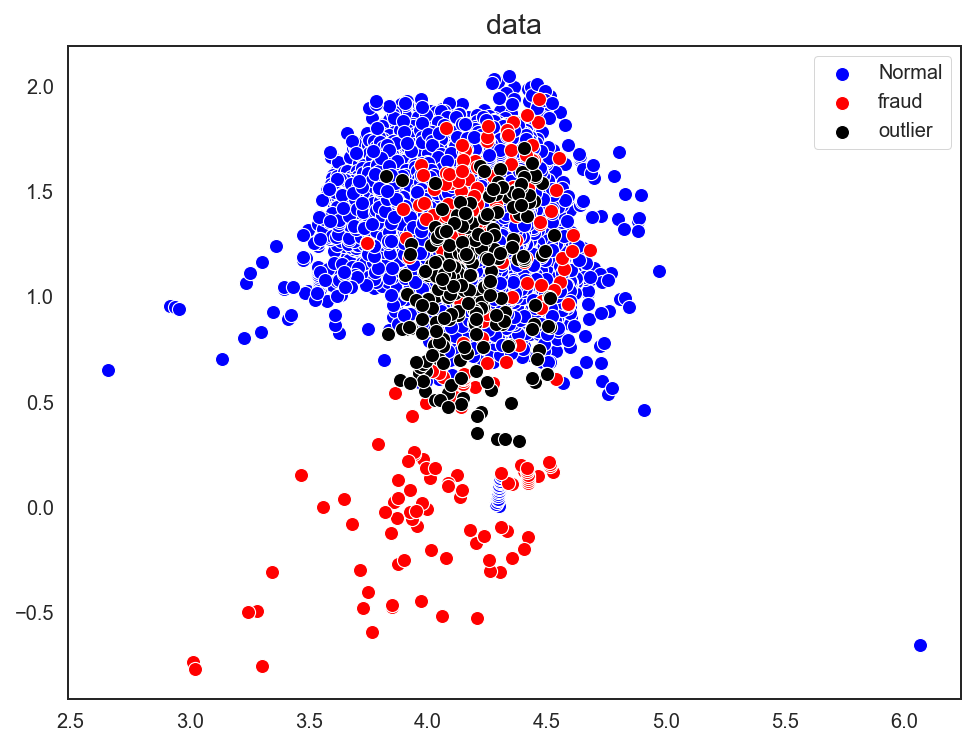

In [50]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

In [51]:
lof_t=pd.DataFrame(lof_res['Class'])
lof_res.drop(['Class'],axis=1,inplace=True)
lof_ot=pd.DataFrame(lof_out['Class'])
lof_out.drop(['Class'],axis=1,inplace=True)

isf_t=pd.DataFrame(isf_res['Class'])
isf_res.drop(['Class'],axis=1,inplace=True)
isf_ot=pd.DataFrame(isf_out['Class'])
isf_out.drop(['Class'],axis=1,inplace=True)

ee_t=pd.DataFrame(ee_res['Class'])
ee_res.drop(['Class'],axis=1,inplace=True)
ee_ot=pd.DataFrame(ee_out['Class'])
ee_out.drop(['Class'],axis=1,inplace=True)

osvm_t=pd.DataFrame(osvm_res['Class'])
osvm_res.drop(['Class'],axis=1,inplace=True)
osvm_ot=pd.DataFrame(osvm_out['Class'])
osvm_out.drop(['Class'],axis=1,inplace=True)

# Balancing

In [52]:
k=1

In [53]:
import datetime
print(datetime.datetime.now())

2022-05-16 23:59:05.086036


In [54]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import AllKNN 
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [55]:
def resmaker1(k,name,X_resampled, y_resampled,sampling_c,X_test,y_test):
    RF = RandomForestClassifier()
    RF.fit(X_resampled, y_resampled)
    preds = RF.predict(X_test)
    classes=y_resampled.value_counts()
    normal_share=round(classes[0]/y_resampled.count()*100,2)
    fraud_share=round(classes[1]/y_resampled.count()*100, 2)
    R=classification_report(y_test, preds,output_dict=True)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sampling_res.loc[sampling_c]=[name,X_resampled.shape,normal_share,fraud_share,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
    sampling_c+=1
    return sampling_c

## Over-sampling

### KMeansSMOTE

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = KMeansSMOTE(random_state=0,sampling_strategy=i,cluster_balance_threshold=0.005)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'KMeansSMOTE',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [57]:
sampling_res.to_csv('RF-sammpling.csv',index=False)

### RandomOverSampler

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'RandomOverSampler',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [59]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [60]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [61]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [63]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### SMOTE

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'SMOTE',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [65]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [66]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [67]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [68]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [69]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### ADASYN

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'ADASYN',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [71]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [72]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [73]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [74]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [75]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

## Under-sampling 

In [76]:
sampling_res.to_csv('RF-sammpling.csv',index=False)

### RandomUnderSampler

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'RandomUnderSampler',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [78]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [79]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [80]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [81]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [82]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### TomekLinks

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'TomekLinks',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [84]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [85]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [86]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [87]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [88]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### InstanceHardnessThreshold

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'InstanceHardnessThreshold',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [90]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [91]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [92]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [93]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [94]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### NearMiss

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'NearMiss',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [96]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [97]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [98]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [99]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [100]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

### AllKNN

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'AllKNN',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [102]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [103]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [104]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [105]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [106]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)

## Combination of over- and under-sampling

### SMOTETomek

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'SMOTETomek',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [109]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [110]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [112]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [113]:
sampling_res.to_csv('RF-sammpling.csv',index=False)
sampling_res.to_excel('RF-sammpling.xlsx',index=False)